<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica25_263150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 25: Regresion de datos categóricos**
---

Alumno: Álvaro Hernandez Jarquín<br>
Seminario: Programación para analítica descriptiva y predictiva
---

**Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

# 1. Carga de datos

Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).

Realiza lo siguiente:

*   Convierte si es necesario la variable location a tipo de dato categórico
*   Usa la instrucción describe() en las variables salary y cost
* Cuenta la cantidad de datos que hay por categoría en location
* Convierte la variable location usando one-hot encoding


In [60]:
# Cargamos el conjunto de datos college.csv en un dataframe.
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/college.csv')
print(df.head())

   id                                         name  salary    cost   public  \
0   1  Massachusetts Institute of Technology (MIT)  119000  189300  Private   
1   2                           Harvard University  121000  189600  Private   
2   3                            Dartmouth College  123000  188400  Private   
3   4                         Princeton University  123000  188700  Private   
4   5                              Yale University  110000  194200  Private   

  location  
0       NE  
1       NE  
2       NE  
3       NE  
4       NE  


In [61]:
# Seleccionamos las columnas salary, cost y location.
df_variables = df[['salary', 'cost', 'location']]
print(df_variables.head())

   salary    cost location
0  119000  189300       NE
1  121000  189600       NE
2  123000  188400       NE
3  123000  188700       NE
4  110000  194200       NE


In [117]:
# Convertimos location a tipo de dato categórico
df_variables['location'] = df_variables['location'].astype('category')
print(df_variables.dtypes)

salary         int64
cost           int64
location    category
dtype: object


In [118]:
# Usamos describe() para las variables salary y cost
print(df_variables.describe())

              salary           cost
count      85.000000      85.000000
mean    95898.823529  142434.470588
std     11937.121912   53913.064578
min     74900.000000   18260.000000
25%     87100.000000   84670.000000
50%     93200.000000  169200.000000
75%    105000.000000  188700.000000
max    123000.000000  227300.000000


In [119]:
# Contamos la cantidad de datos por categoría en 'location'
print(df_variables['location'].value_counts())

location
NE    25
W     21
S     20
MW    19
Name: count, dtype: int64


In [120]:
# Convertimos la variable location usando one-hot encoding
from sklearn.preprocessing import OneHotEncoder

data = pd.DataFrame(df_variables['location'])

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(data[['location']])

encoded_df_variable = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['location']))

print(encoded_df_variable)

    location_NE  location_S  location_W
0           1.0         0.0         0.0
1           1.0         0.0         0.0
2           1.0         0.0         0.0
3           1.0         0.0         0.0
4           1.0         0.0         0.0
..          ...         ...         ...
80          0.0         0.0         1.0
81          0.0         0.0         1.0
82          0.0         0.0         1.0
83          0.0         0.0         1.0
84          0.0         0.0         1.0

[85 rows x 3 columns]


# 2. Análisis Exploratorio de los Datos

Realiza un análisis exploratorio de los datos y discute lo que observas en cada gráfica.


*   Crea un histograma de la columna salary. Discute lo que observas
* Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas
* Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas

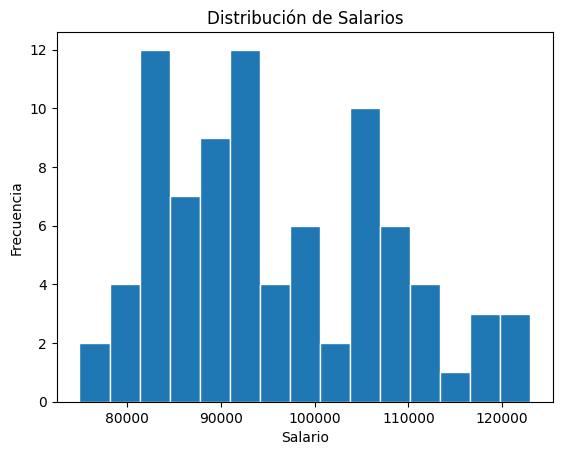

In [121]:
# Creamos un histograma de la columna salary
import matplotlib.pyplot as plt
plt.hist(df_variables['salary'], bins=15, edgecolor='white')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

- Se encuentra un poco sesgada hacia la izquierda.
- Casi todos los salarios se encuentran entre 80,000 y 100,000
- Existen valores _outliers_ hacia arriba y hacia abajo
- No hay distribución normal

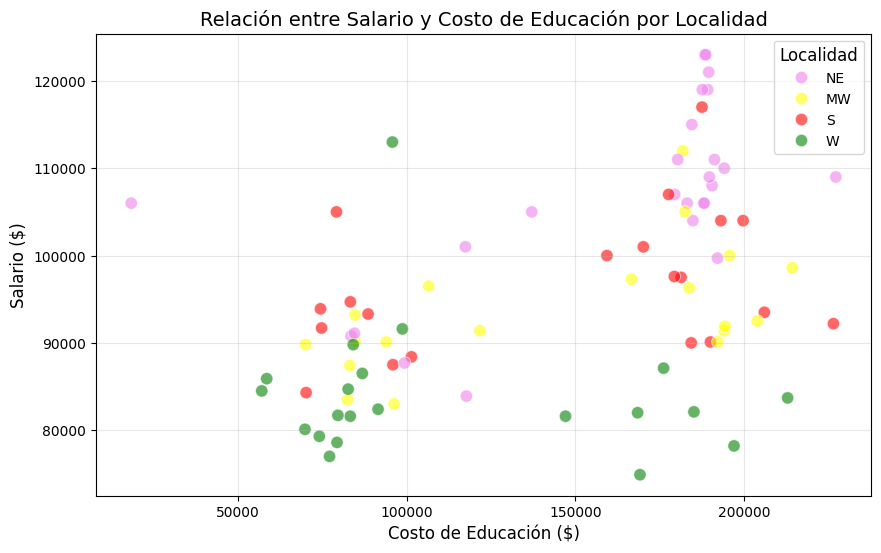

In [122]:
# Creamos un diagrama de dispersión de salary vs cost
import seaborn as sns

df_variables = df[['salary', 'cost', 'location']].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_variables['cost'],
                y=df_variables['salary'],
                hue=df_variables['location'],
                palette=['violet', 'yellow', 'red', 'green'],
                s=80,
                alpha=0.6)
plt.title('Relación entre Salario y Costo de Educación por Localidad', fontsize=14)
plt.xlabel('Costo de Educación ($)', fontsize=12)
plt.ylabel('Salario ($)', fontsize=12)
plt.legend(title='Localidad', title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


- Podemos ver que los del Oeste (W) se concentran en universidades de menor costo
- Los del Noreste (NE) tienen los salarios más altos y las universidades más caras

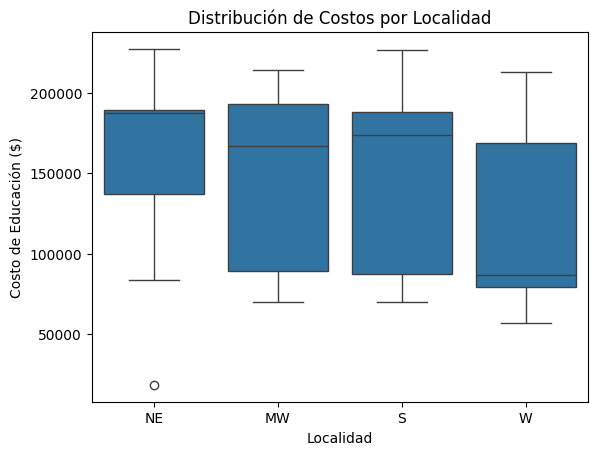

In [123]:
# Hacemos un boxplot que muestre diferencias en los costos según la ubicación
sns.boxplot(x=df_variables['location'], y=df_variables['cost'])
plt.title('Distribución de Costos por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Costo de Educación ($)')
plt.show()

Lo que observamos en la gráfica anterior se confirma más claramente en estas gráficas:
- Las localidades con universidades más caras son en el Noreste (NE)
- Las universidades más baratas están en el Oeste (W)

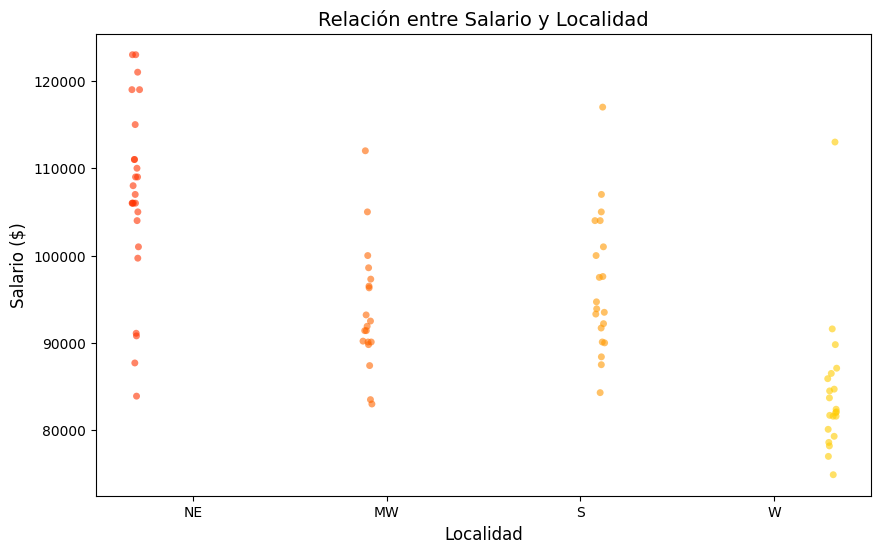

In [124]:
# Hacemos un diagrama stripplot o swarmplot

plt.figure(figsize=(10, 6))
box = sns.stripplot(x=df_variables['location'],
                    y=df_variables['salary'],
                    hue=df_variables['location'],
                    data = df_variables,
                    palette='autumn',
                    dodge=True,
                    alpha=0.6)

plt.title('Relación entre Salario y Localidad', fontsize=14)
plt.xlabel('Localidad', fontsize=12)
plt.ylabel('Salario ($)', fontsize=12)
plt.show()


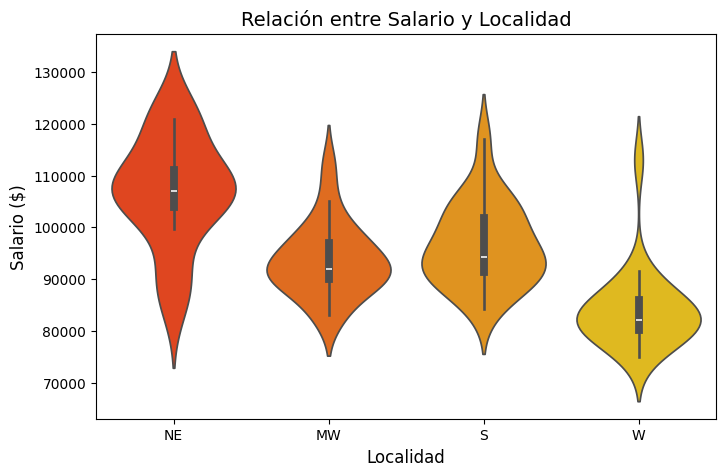

In [125]:
# Hacemos un diagrama de violín

plt.figure(figsize=(8, 5))
sns.violinplot(x=df_variables['location'], y=df_variables['salary'], hue=df_variables['location'], data=df_variables, palette='autumn')
plt.title('Relación entre Salario y Localidad', fontsize=14)
plt.xlabel('Localidad', fontsize=12)
plt.ylabel('Salario ($)', fontsize=12)
plt.show()


# 3. Construcción del modelo de regresión

- Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding.
- Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos.

In [126]:
# Construimos un modelo de regresión con salario, costo y location
from sklearn.linear_model import LinearRegression

# Preparar variables independientes (X) y dependiente (y)
X = pd.concat([df_variables['cost'], encoded_df_variable], axis=1)
y = df_variables['salary']

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

#Coeficientes
print(f"Intercepto (β₀): {modelo.intercept_:.2f}")
print(f"Coeficiente de costo (β₁): {modelo.coef_[0]:.4f}")


Intercepto (β₀): 84988.72
Coeficiente de costo (β₁): 0.0605


### **Ecuación del modelo:**<br>
```
salary = 84988.72 + 0.0605*cost + 12032.8197*location_NE + 2800.3450*location_S - 7721.4201*location_W
```

#### **Interpretación por ubicación**

1. Para Location_MW (ubicación de referencia):

```
salary = 84988.72 + 0.0605*cost
```

Cuando location_NE = 0, location_S = 0, location_W = 0

2. Para Location_NE:

```
salary = 84988.72 + 0.0605*cost + 12032.8197*1
salary = 97021.54 + 0.0605*cost
```
Cuando location_NE = 1, location_S = 0, location_W = 0

3. Para Location_S:
```
salary = 84988.72 + 0.0605*cost + 2800.3450*1
salary = 87789.06 + 0.0605*cost
```
Cuando location_NE = 0, location_S = 1, location_W = 0

4. Para location_W:
```
salary = 84988.72 + 0.0605*cost - 7721.4201*1
salary = 77267.30 + 0.0605*cost
```
Cuando location_NE = 0, location_S = 0, location_W = 1


En las fórmulas observamos con claridad cómo los salarios más altos son de las personas que se encuentran en el Noreste (NE), tal como lo observamos en una de las gráficas

# 4. Análisis de Residuos

- Construye una visualización de predicciones (salario estimado) vs valores reales (salario real).
- Crea una gráfica de los errores residuales. Discute lo que observas

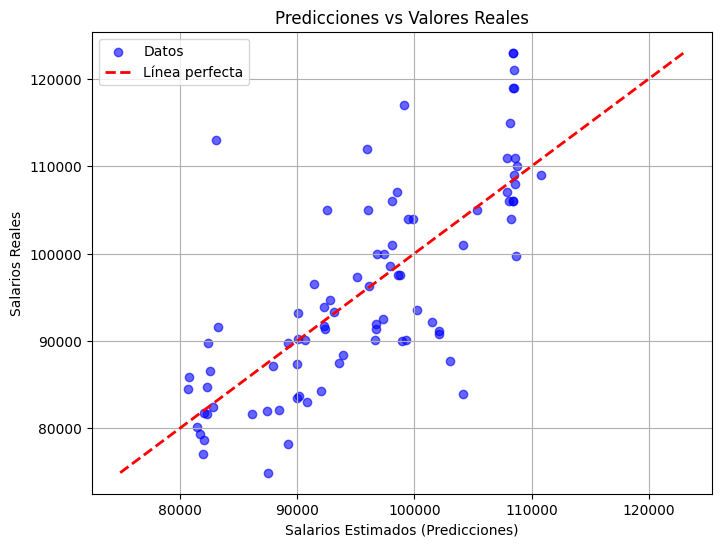

In [127]:
y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, df_variables['salary'], color='blue', alpha=0.6, label='Datos')
plt.plot([df_variables['salary'].min(), df_variables['salary'].max()],
         [df_variables['salary'].min(), df_variables['salary'].max()],
         color='red', linestyle='--', linewidth=2, label='Línea perfecta')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Salarios Estimados (Predicciones)')
plt.ylabel('Salarios Reales')
plt.legend()
plt.grid(True)
plt.show()

Aunque no es exacta la distribución, no se encuentra muy fuera de lo esperado.

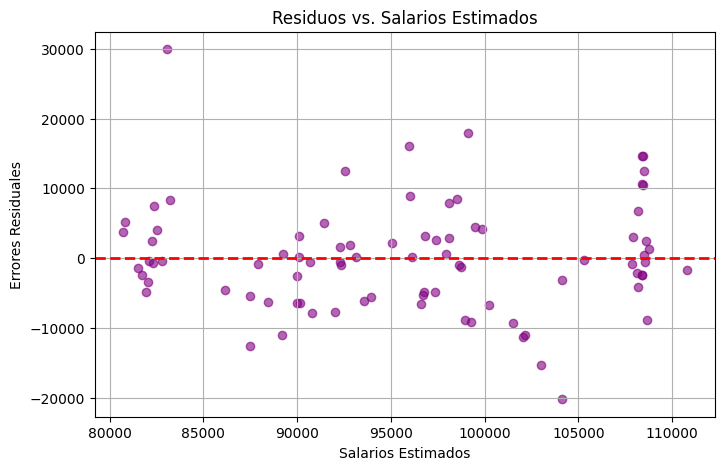

In [106]:
# Gráfica de Errores Residuales
residuals = y - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Salarios Estimados")
plt.ylabel("Errores Residuales")
plt.title("Residuos vs. Salarios Estimados")
plt.grid(True)
plt.show()

Existen varios errores residuales que se observan por los puntos alejados de la línea roja.

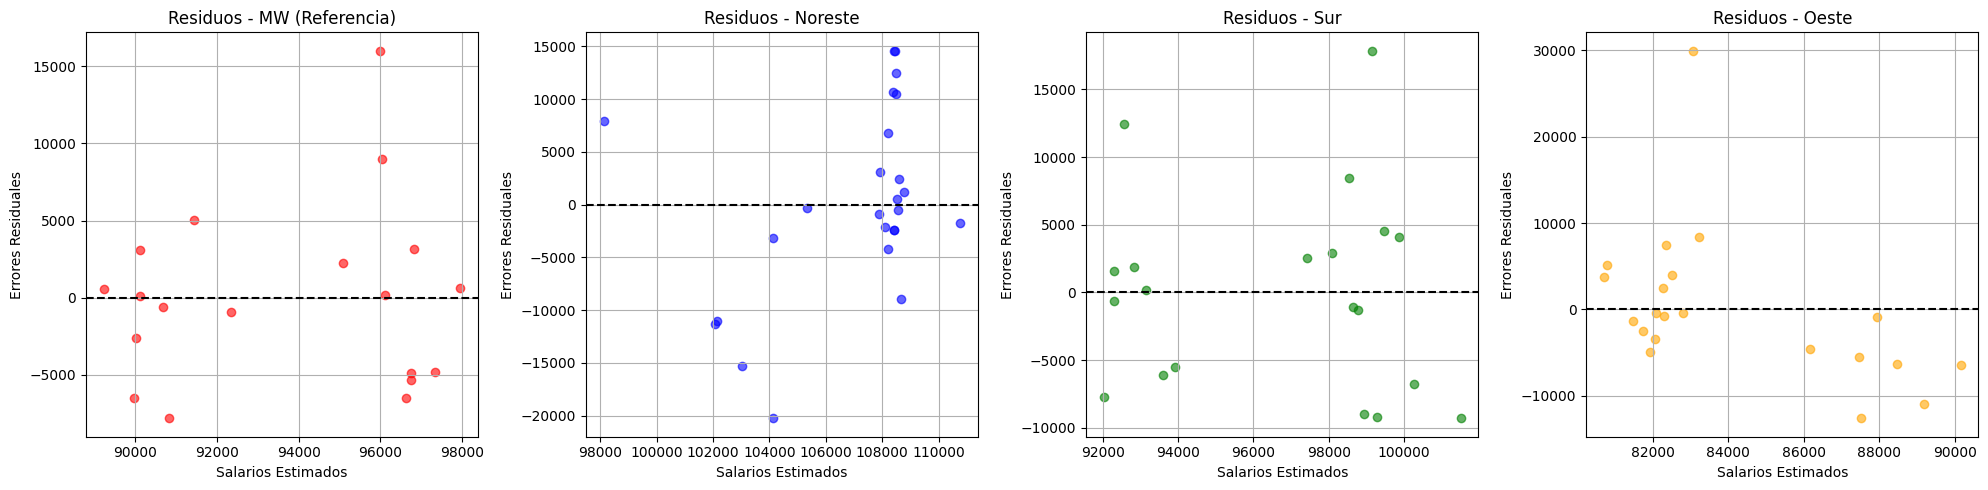

In [109]:
# Residuos por Ubicación (incluyendo MW)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

locations = ['MW', 'location_NE', 'location_S', 'location_W']
location_names = ['MW (Referencia)', 'Noreste', 'Sur', 'Oeste']
colors = ['red', 'blue', 'green', 'orange']

for i, (loc, name, color) in enumerate(zip(locations, location_names, colors)):
    if loc == 'MW':
        mask = (encoded_df_variable['location_NE'] == 0) & \
               (encoded_df_variable['location_S'] == 0) & \
               (encoded_df_variable['location_W'] == 0)
    else:
        mask = encoded_df_variable[loc] == 1

    axes[i].scatter(y_pred[mask], residuals[mask], alpha=0.6, color=color)
    axes[i].axhline(0, color='black', linestyle='--')
    axes[i].set_xlabel('Salarios Estimados')
    axes[i].set_ylabel('Errores Residuales')
    axes[i].set_title(f'Residuos - {name}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 5. Evalúa el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).
- Calcula el R² Score

Discute estos resultados obtenidos.

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 60480269.14657189
Coeficiente de Determinación (R^2): 0.5705089716684086


- El coeficiente de determinación nos muestra que los salarios varían un 57.05%, por lo cual es un modelo moderado. Así que, debe hacer otros factores que afectan el salario.
- El modelo es predictivo de forma moderada y las variables "cost" y "location" explican la mitad de la variabilidad de los salarios.
- Si se incluyen otras variables puede mejorar la predictibilidad.
- Se puede usar para ver tendencias generales, pero con cuidado

# 6. Realiza un análisis de varianza con stastmodel

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [113]:
# Análisis de Varianza con statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Preparamos el DataFrame para statsmodels
df_analysis = pd.concat([df_variables[['salary', 'cost']], encoded_df_variable], axis=1)

# Definimos la fórmula del modelo
formula = 'salary ~ cost + location_NE + location_S + location_W'

# Ajustamos el modelo con statsmodels
modelo_sm = ols(formula, data=df_analysis).fit()

# Realizamos el ANOVA
anova_table = sm.stats.anova_lm(modelo_sm, typ=2)

print("=" * 50)
print("Análisis de Varianza (ANOVA)")
print("=" * 50)
print(anova_table)
print("\n" + "=" * 50)

# Resumen completo del modelo
print("Resumen completo del modelo:")
print("=" * 50)
print(modelo_sm.summary())

Análisis de Varianza (ANOVA)
                   sum_sq    df          F    PR(>F)
cost         7.878166e+08   1.0  12.259774  0.000760
location_NE  1.534740e+09   1.0  23.883181  0.000005
location_S   7.639007e+07   1.0   1.188760  0.278853
location_W   5.696576e+08   1.0   8.864847  0.003846
Residual     5.140823e+09  80.0        NaN       NaN

Resumen completo del modelo:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     26.57
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           4.96e-14
Time:                        18:42:22   Log-Likelihood:                -882.12
No. Observations:                  85   AIC:                             1774.
Df Residuals:                      80   BIC:                          

- El costo de vida influye en el salario cada que aumenta el costo 1, aumenta $0.0605 el salario
- El modelo explica el 57.1% de la variación, tal como lo observamos en la fórmula (57.05%)
- El Noreste es el mejor pagado, Oeste es el peor pagado y Sur y Medio oeste no tienen una diferencia muy grande.